In [1]:
import numpy as np
import GPy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Read in the train and test csv
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [3]:
# Drop nulls
train_data = train_data.dropna(axis=0, how='any')
test_data = test_data.dropna(axis=0, how='any')

In [4]:
# Extract Relativetime as Y data for training and lineary scale it
sc = StandardScaler()
y_Train = sc.fit_transform(train_data['RelativeTimeMilliseconds'].values.reshape(-1, 1))
y_Test = sc.fit_transform(test_data['RelativeTimeMilliseconds'].values.reshape(-1, 1))

print(y_Train)

[[-1.72993915]
 [-1.72896129]
 [-1.72749449]
 ...
 [ 1.72192964]
 [ 1.72241857]
 [ 1.72290751]]


In [5]:
# Extract 3 features for input to model
featCols = ['Tidal Volume', 'HR',"RR"]
X_Train = train_data.loc[:,featCols]
X_Test = test_data.loc[:,featCols]
X_Train

Tidal Volume    HR  RR
20              11  68.0  13
21              11  68.0  13
22              11  70.0   9
23              11  70.0   9
24              11  70.0   9
...            ...   ...  ..
3545           898  51.0   7
3546           898  51.0   7
3547           898  51.0   7
3548           898  51.0   7
3549           155  51.0   7

[3370 rows x 3 columns]

In [6]:
# Scale X data
X_Train = sc.fit_transform(X_Train)
X_Test = sc.fit_transform(X_Test)

In [7]:
# Create model with 3 input dims + time
kernel = GPy.kern.RBF(3, ARD=True) 
model = GPy.models.GPRegression(X_Train, y_Train, kernel)
model.optimize(messages=True, max_f_eval = 1000)
display(model)

In [8]:
pred = model.predict(X_Train, include_likelihood=False)
print(pred)
pred = model.predict(X_Train, include_likelihood=True)
print(pred)

(array([[-1.72678449],
       [-1.72678449],
       [-1.72506719],
       ...,
       [ 1.71949884],
       [ 1.71949884],
       [ 1.7176044 ]]), array([[0.00151872],
       [0.00151872],
       [0.001013  ],
       ...,
       [0.00060805],
       [0.00060805],
       [0.00303277]]))
(array([[-1.72678449],
       [-1.72678449],
       [-1.72506719],
       ...,
       [ 1.71949884],
       [ 1.71949884],
       [ 1.7176044 ]]), array([[0.00456085],
       [0.00456085],
       [0.00405513],
       ...,
       [0.00365018],
       [0.00365018],
       [0.0060749 ]]))


In [21]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]

#model.plot(visible_dims = [0])
#model.plot(visible_dims = [1])
#model.plot(visible_dims = [2])

In [19]:
#model.plot(visible_dims = [0,1])
#model.plot(visible_dims = [1,2])
#model.plot(visible_dims = [0,2])

# 1 x   -----------------    Multiple Ys

In [11]:
kernel1X = GPy.kern.RBF(input_dim =1, ARD=True) 
model1X = GPy.models.GPRegression(y_Train, X_Train, kernel1X)
model1X.optimize(messages=True, max_f_eval = 1000)
display(model1X)

{'dataplot': [<matplotlib.collections.PathCollection at 0x1257a4580>,
 'gpmean': [[<matplotlib.lines.Line2D at 0x124ceb190>,
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x124ceb910>,
  <matplotlib.collections.PolyCollection at 0x124cebf70>]}

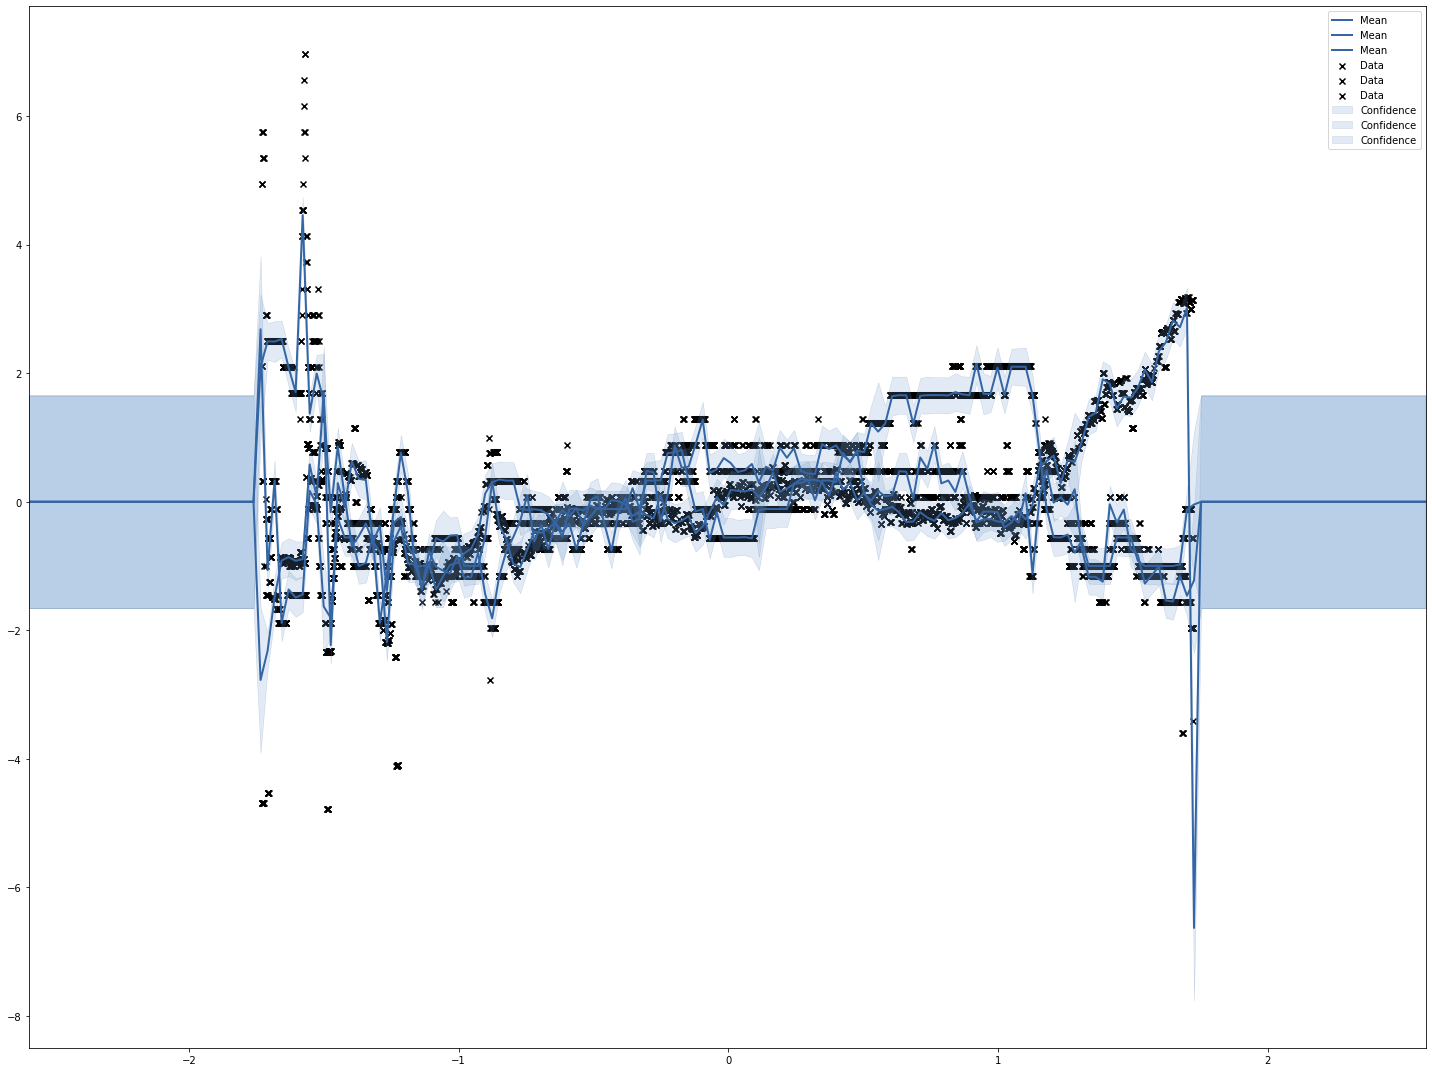

In [12]:
model1X.plot()

# No time just X vitalsign and Y vitalsign

In [13]:
# Extract 2 features for input to model
featColsX = ['HR']
X_Train2 = train_data.loc[:,featColsX]
X_Test2 = test_data.loc[:,featColsX]
featColsY = ['RR']
y_Train2 = train_data.loc[:,featColsY]
y_Test2 = test_data.loc[:,featColsY]

# Scale X data
X_Train2 = sc.fit_transform(X_Train2)
X_Test2 = sc.fit_transform(X_Test2)

y_Train2 = sc.fit_transform(y_Train2)
y_Test2 = sc.fit_transform(y_Test2)

In [22]:
#plt.plot(X_Train2, y_Train2)

In [15]:
#kernelXY = GPy.kern.RBF(1, ARD=True) 
#modelXY = GPy.models.GPRegression(X_Train2, y_Train2, kernelXY)
#modelXY.optimize(messages=True, max_f_eval = 1000)
#display(modelXY)

In [16]:
#modelXY.plot()

In [17]:
X_Train

array([[-4.67809628,  4.94092083,  2.10592601],
       [-4.67809628,  4.94092083,  2.10592601],
       [-4.67809628,  5.75266504,  0.33079578],
       ...,
       [ 3.13822903, -1.95890499, -0.55676933],
       [ 3.13822903, -1.95890499, -0.55676933],
       [-3.40915508, -1.95890499, -0.55676933]])

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gpr = GaussianProcessRegressor(kernel= kernel,random_state=0).fit(y_Train, X_Train)


In [20]:
print("Training data score:")
print(gpr.score(y_Train, X_Train))
print("Test data score:")
print(gpr.score(y_Test, X_Test))

print("predict train")
print(gpr.predict(y_Train))
print("predict test")
print(gpr.predict(y_Test))


Training data score:
1.0
Test data score:
0.02628342870084399
predict train
[[-4.67809628  4.94092083  2.10592601]
 [-4.67809628  4.94092083  2.10592601]
 [-4.67809628  5.75266504  0.33079578]
 ...
 [ 3.13822902 -1.95890499 -0.55676933]
 [ 3.13822902 -1.95890499 -0.55676933]
 [-3.40915508 -1.95890499 -0.55676933]]
predict test
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [71]:
#featCols = ['Tidal Volume', 'HR', 'RR', 'SpO2', 'Pulse']
X_Train = train_data.loc[:,featCols]


Y_axis = StandardScaler().fit_transform(train_data['Pulse'].values.reshape(-1,1))
Z_axis = StandardScaler().fit_transform(train_data['RR'].values.reshape(-1, 1))

#X_axis = train_data['RelativeTimeMilliseconds']
X_axis = sc.fit_transform(train_data['RelativeTimeMilliseconds'].values.reshape(-1, 1))

print(YZ_axis)


[[-4.67809628  4.94092083  2.10592601  1.52575072  4.69387826]
 [-4.67809628  4.94092083  2.10592601  1.52575072  3.93229959]
 [-4.67809628  5.75266504  0.33079578  1.52575072  3.17072092]
 ...
 [ 3.13822903 -1.95890499 -0.55676933  0.1428083  -1.77954042]
 [ 3.13822903 -1.95890499 -0.55676933  0.1428083  -1.77954042]
 [-3.40915508 -1.95890499 -0.55676933  0.1428083  -1.77954042]]


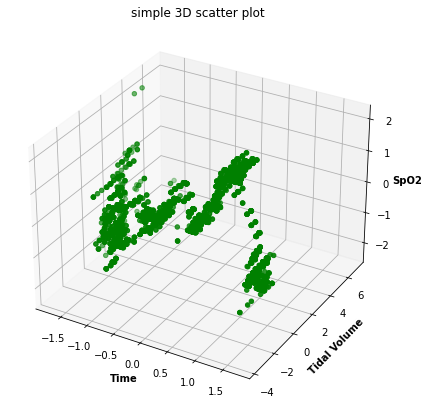

In [72]:

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X_axis, Y_axis, Z_axis, color = "green")
plt.title("simple 3D scatter plot")
ax.set_xlabel('Time', fontweight ='bold')
ax.set_ylabel('Tidal Volume', fontweight ='bold')
ax.set_zlabel('SpO2', fontweight ='bold')
 
# show plot
plt.show()

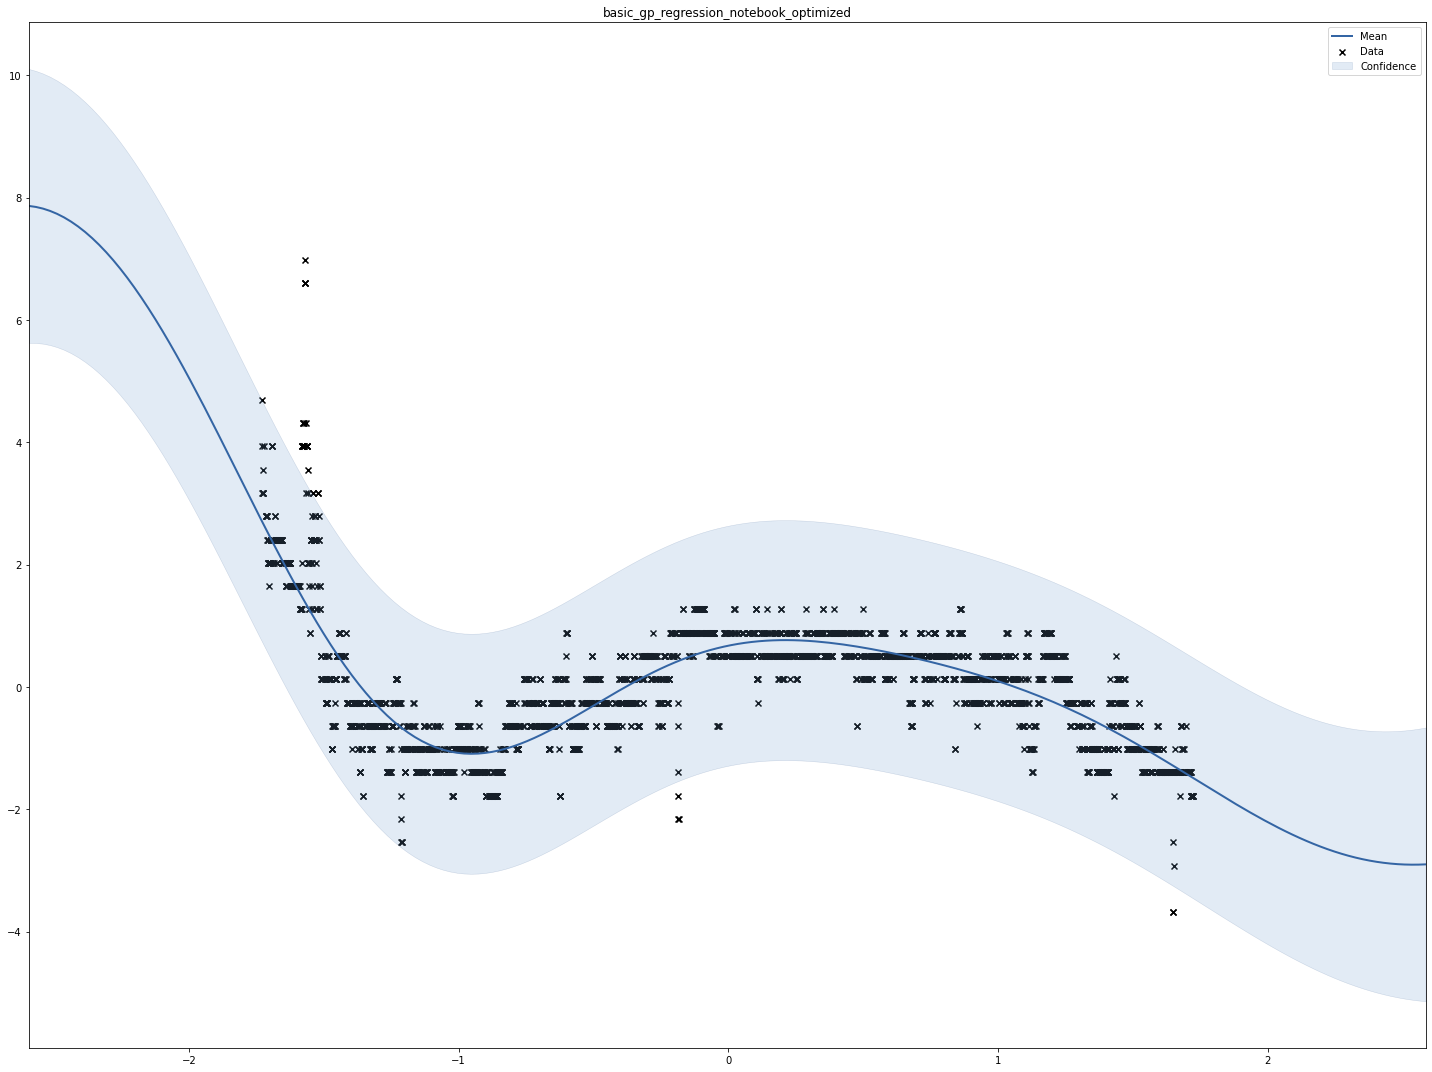

In [78]:
kernel = GPy.kern.RBF(input_dim=1, ARD=True)

Ymodel = GPy.models.GPRegression(X_axis, Y_axis, kernel)

display(Ymodel)
fig = Ymodel.plot(title='basic_gp_regression_notebook_optimized')

Optimization restart 1/2, f = -142.0608823331629
Optimization restart 2/2, f = -142.06088202575665


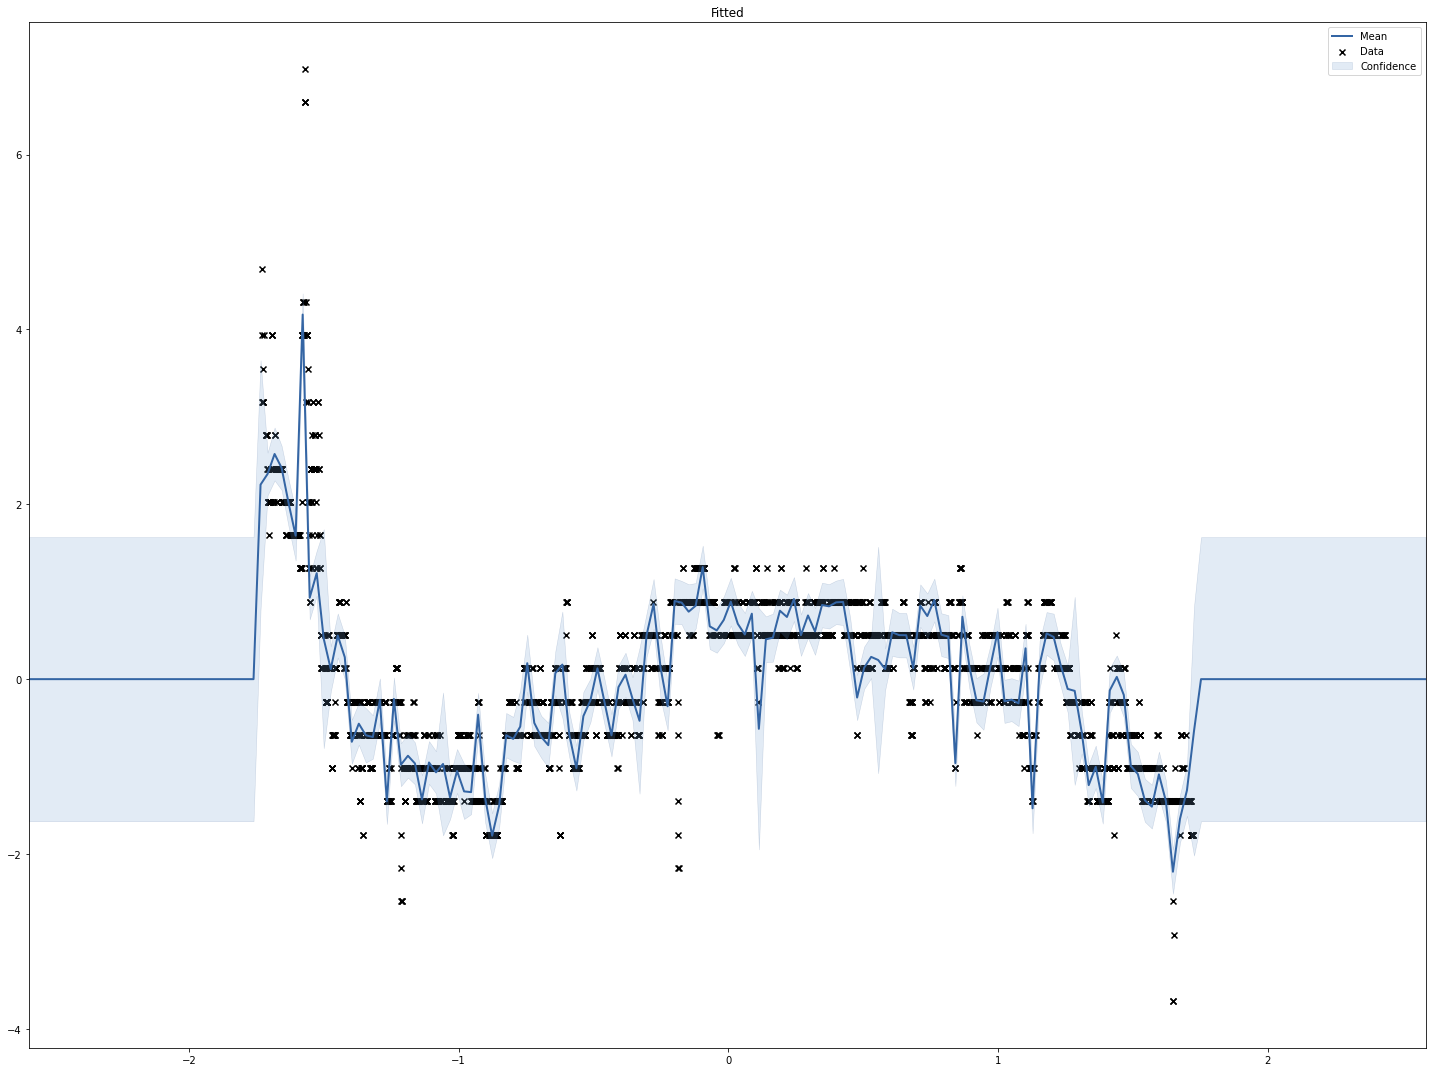

In [75]:
Ymodel.optimize(messages=True)
Ymodel.optimize_restarts(num_restarts = 2)

display(Ymodel)
#fig = m.plot()
fig = Ymodel.plot(title='Fitted')

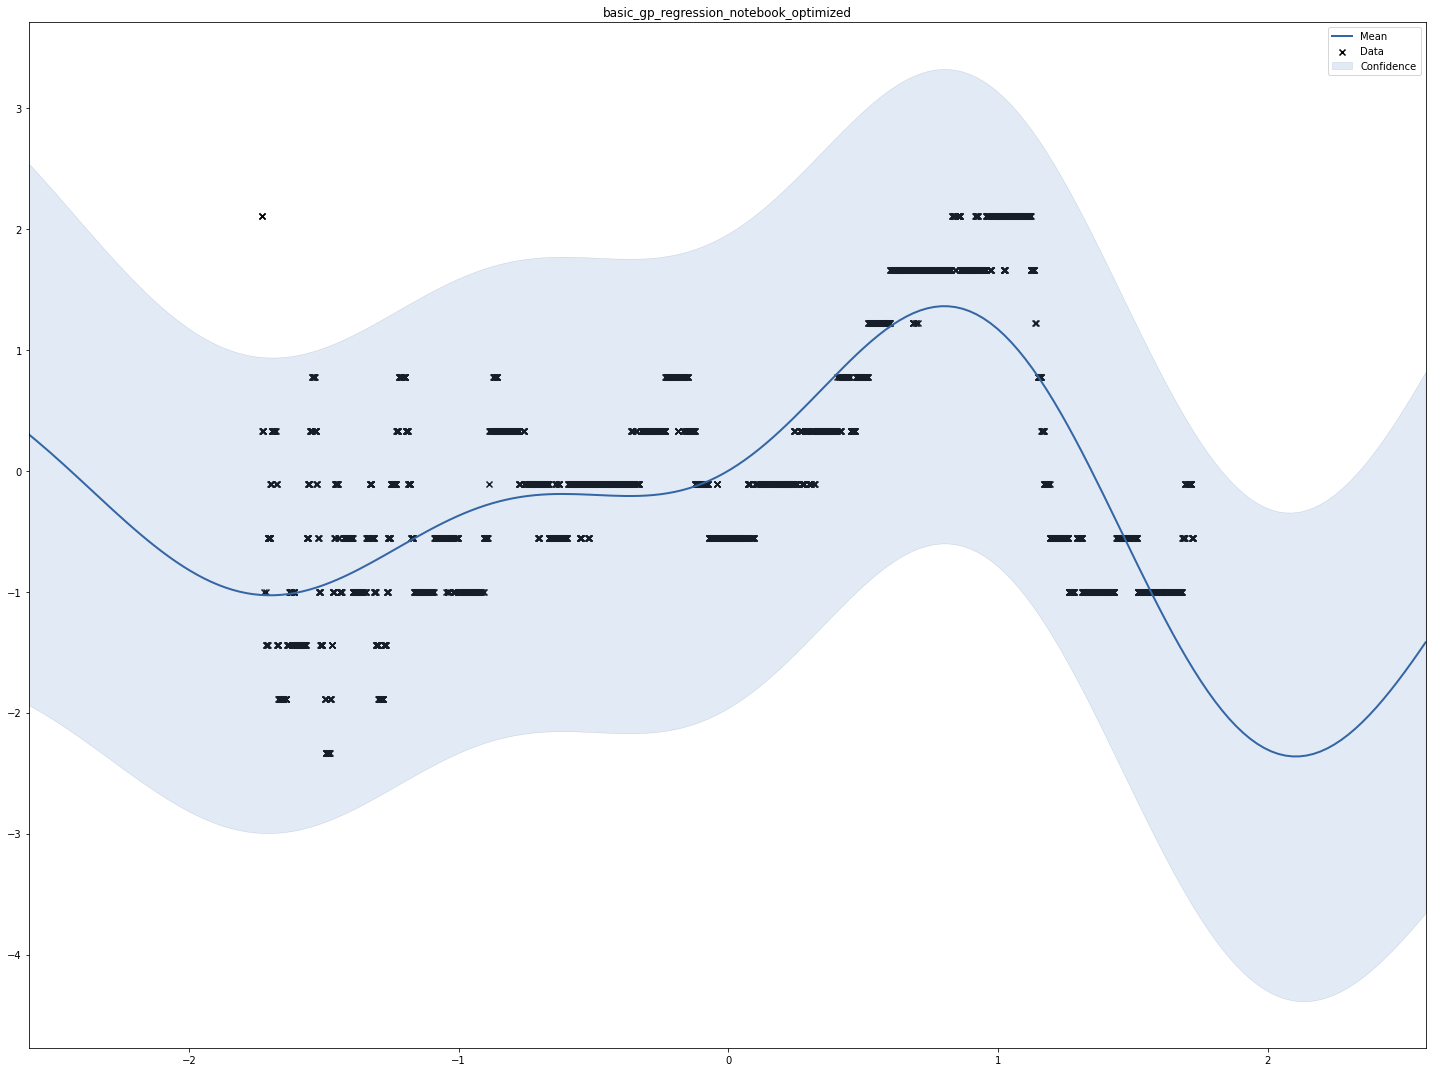

In [76]:
kernel = GPy.kern.RBF(input_dim=1, ARD=True)

Zmodel = GPy.models.GPRegression(X_axis, Z_axis, kernel)

display(Zmodel)
fig = Zmodel.plot(title='basic_gp_regression_notebook_optimized')

Optimization restart 1/2, f = -2380.236149841013
Optimization restart 2/2, f = -2380.2361497635825


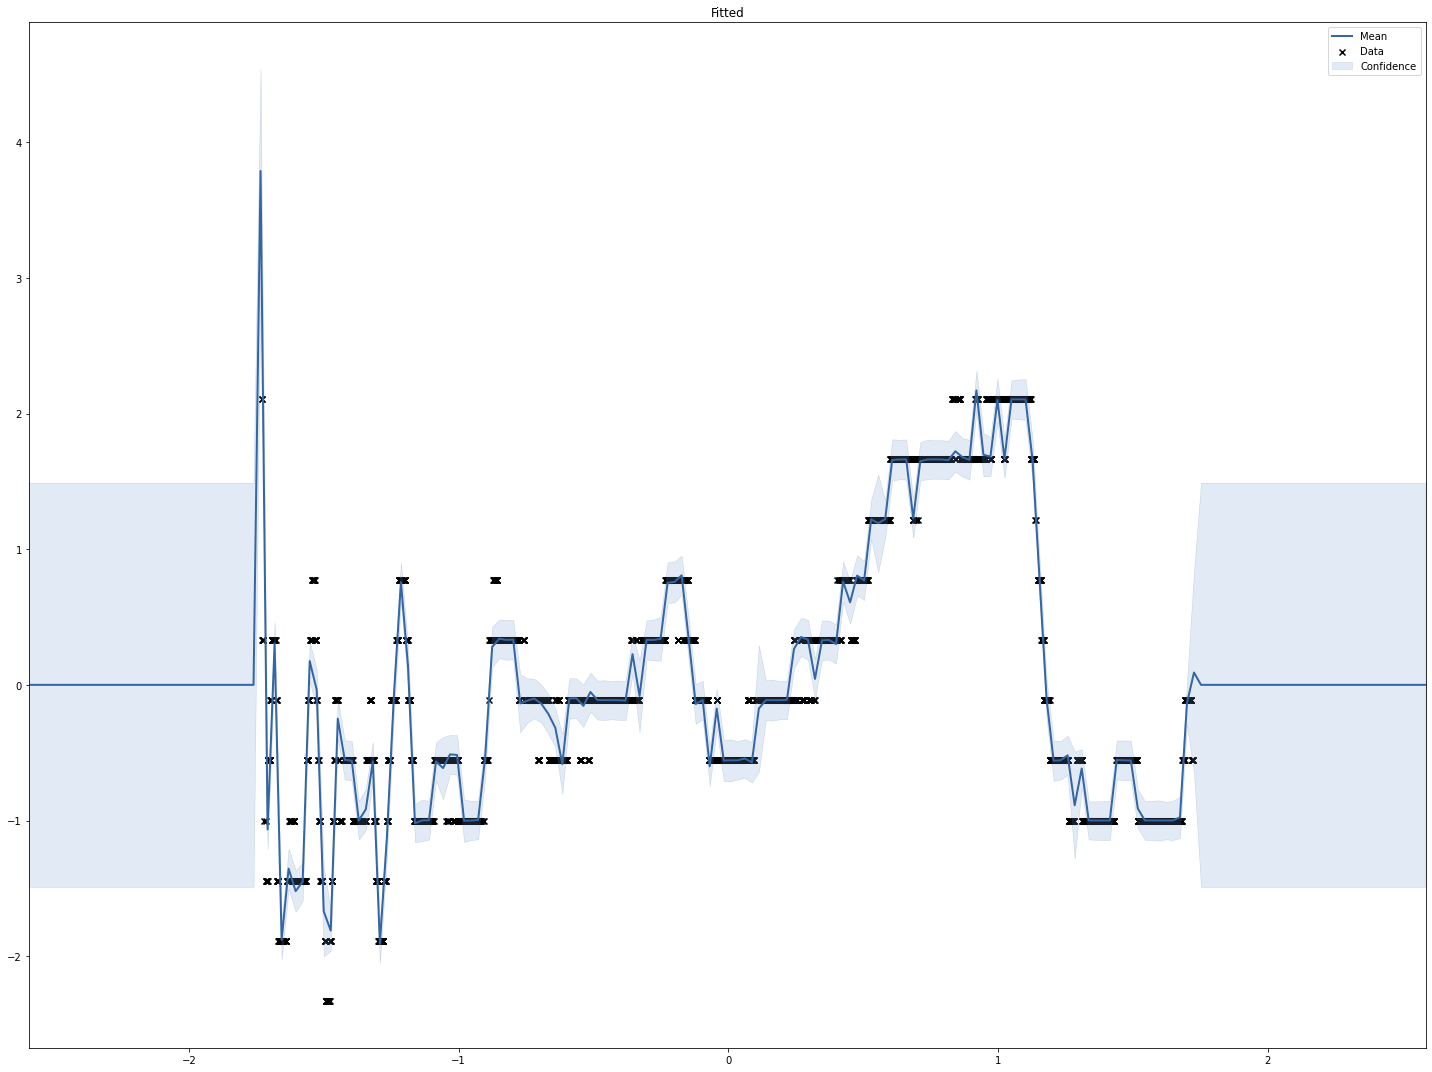

In [77]:
Zmodel.optimize(messages=True)
Zmodel.optimize_restarts(num_restarts = 2)

display(Zmodel)
#fig = m.plot()
fig = Zmodel.plot(title='Fitted')

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X_axis, Y_axis, Z_axis, color = "green")
plt.title("simple 3D scatter plot")
ax.set_xlabel('Time', fontweight ='bold')
ax.set_ylabel('Tidal Volume', fontweight ='bold')
ax.set_zlabel('SpO2', fontweight ='bold')

In [ ]:
#nmgdsnjkgdfsnjkgs